In [55]:
# librarys

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import math
import random
import warnings
warnings.simplefilter('ignore')
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from skrebate import ReliefF
from sklearn.model_selection import cross_val_score
from numpy import array
from mlxtend.feature_selection import ColumnSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.externals.six import StringIO  
from sklearn import svm
from scipy.stats import *
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
# functions
random_state = 233
def evaluate(model, x_test, y_test):
    y_pred = model.predict(x_test)
    #     print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
#     print('Kappa: {:.3f}'.format(cohen_kappa_score(y_test, y_pred)))
# #     print('F1 socre: {:.3f}'.format(f1_score(y_test, y_pred)))
# #     print('Recall socre: {:.3f}'.format(recall_score(y_test, y_pred)))
#     print(classification_report(y_test, y_pred))
    return(accuracy_score(y_test, y_pred))

def report(model, x_test, y_test):
    y_pred = model.predict(x_test)
    print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
    print('Kappa: {:.3f}'.format(cohen_kappa_score(y_test, y_pred)))
#     print('Recall socre: {:.3f}'.format(recall_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred))
    
def density_plot(locations, data, element):
    # Iterate through the 6 locations
    plt.figure(figsize = (12,9))
    for location in locations:
        # Subset to the locations
        subset = data[data['lv'] == location]

        # Draw the density plot
        sns.distplot(subset[element], hist = True, kde = True, label = location, fit = norm)

#                      label = location)
#         sns.kdeplot(subset[element], bw = 0.15, label = location, kernel = 'gau')
#         sns.distplot(subset[element], lable = location, hist = True, ax = axes)
        
    # Plot formatting
    plt.legend(prop={'size': 16})
    plt.title('Density Plot')
    plt.xlabel(element)
    plt.ylabel('Density')

In [3]:
def reliefF(data, label, ramdom_state):
    x, y = data.drop(label, axis = 1).values, data[label].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 233)
    fs = ReliefF(n_jobs=-1, n_neighbors=len(x_train))
    fs.fit(x_train,y_train)
    relief_result = pd.DataFrame(columns = ['feature', 'score'])
    relief_result['score'] = fs.feature_importances_
    relief_result['feature'] =data.columns[1:len(data.columns)]
    relief_result=relief_result.sort_values(by=['score'], ascending=False)
    return relief_result

In [4]:
data = pd.read_csv("/Users/analytical/Documents/GitHub/Rice_authenticity_ICP_new/grand.csv")
relief_result = pd.read_csv("/Users/analytical/Documents/GitHub/Rice_authenticity_ICP_new/relief_result_python.csv")
relief_result = relief_result.sort_values(by=['score'], ascending=False)
x = data.loc[:, data.columns != 'lv']
y = data.loc[:, data.columns == 'lv']

In [5]:
mask = data['lv'] != 'GG'

data_dup = data

data_dup['lv'][mask] = 'None GG'

In [6]:
relief_result = reliefF(data_dup, 'lv', random_state)

In [7]:
relief_result.head()

,feature,score
25,Cd,0.474044
26,Cs,0.379747
12,Co,0.320601
15,Zn,0.216664
28,Hg,0.186258


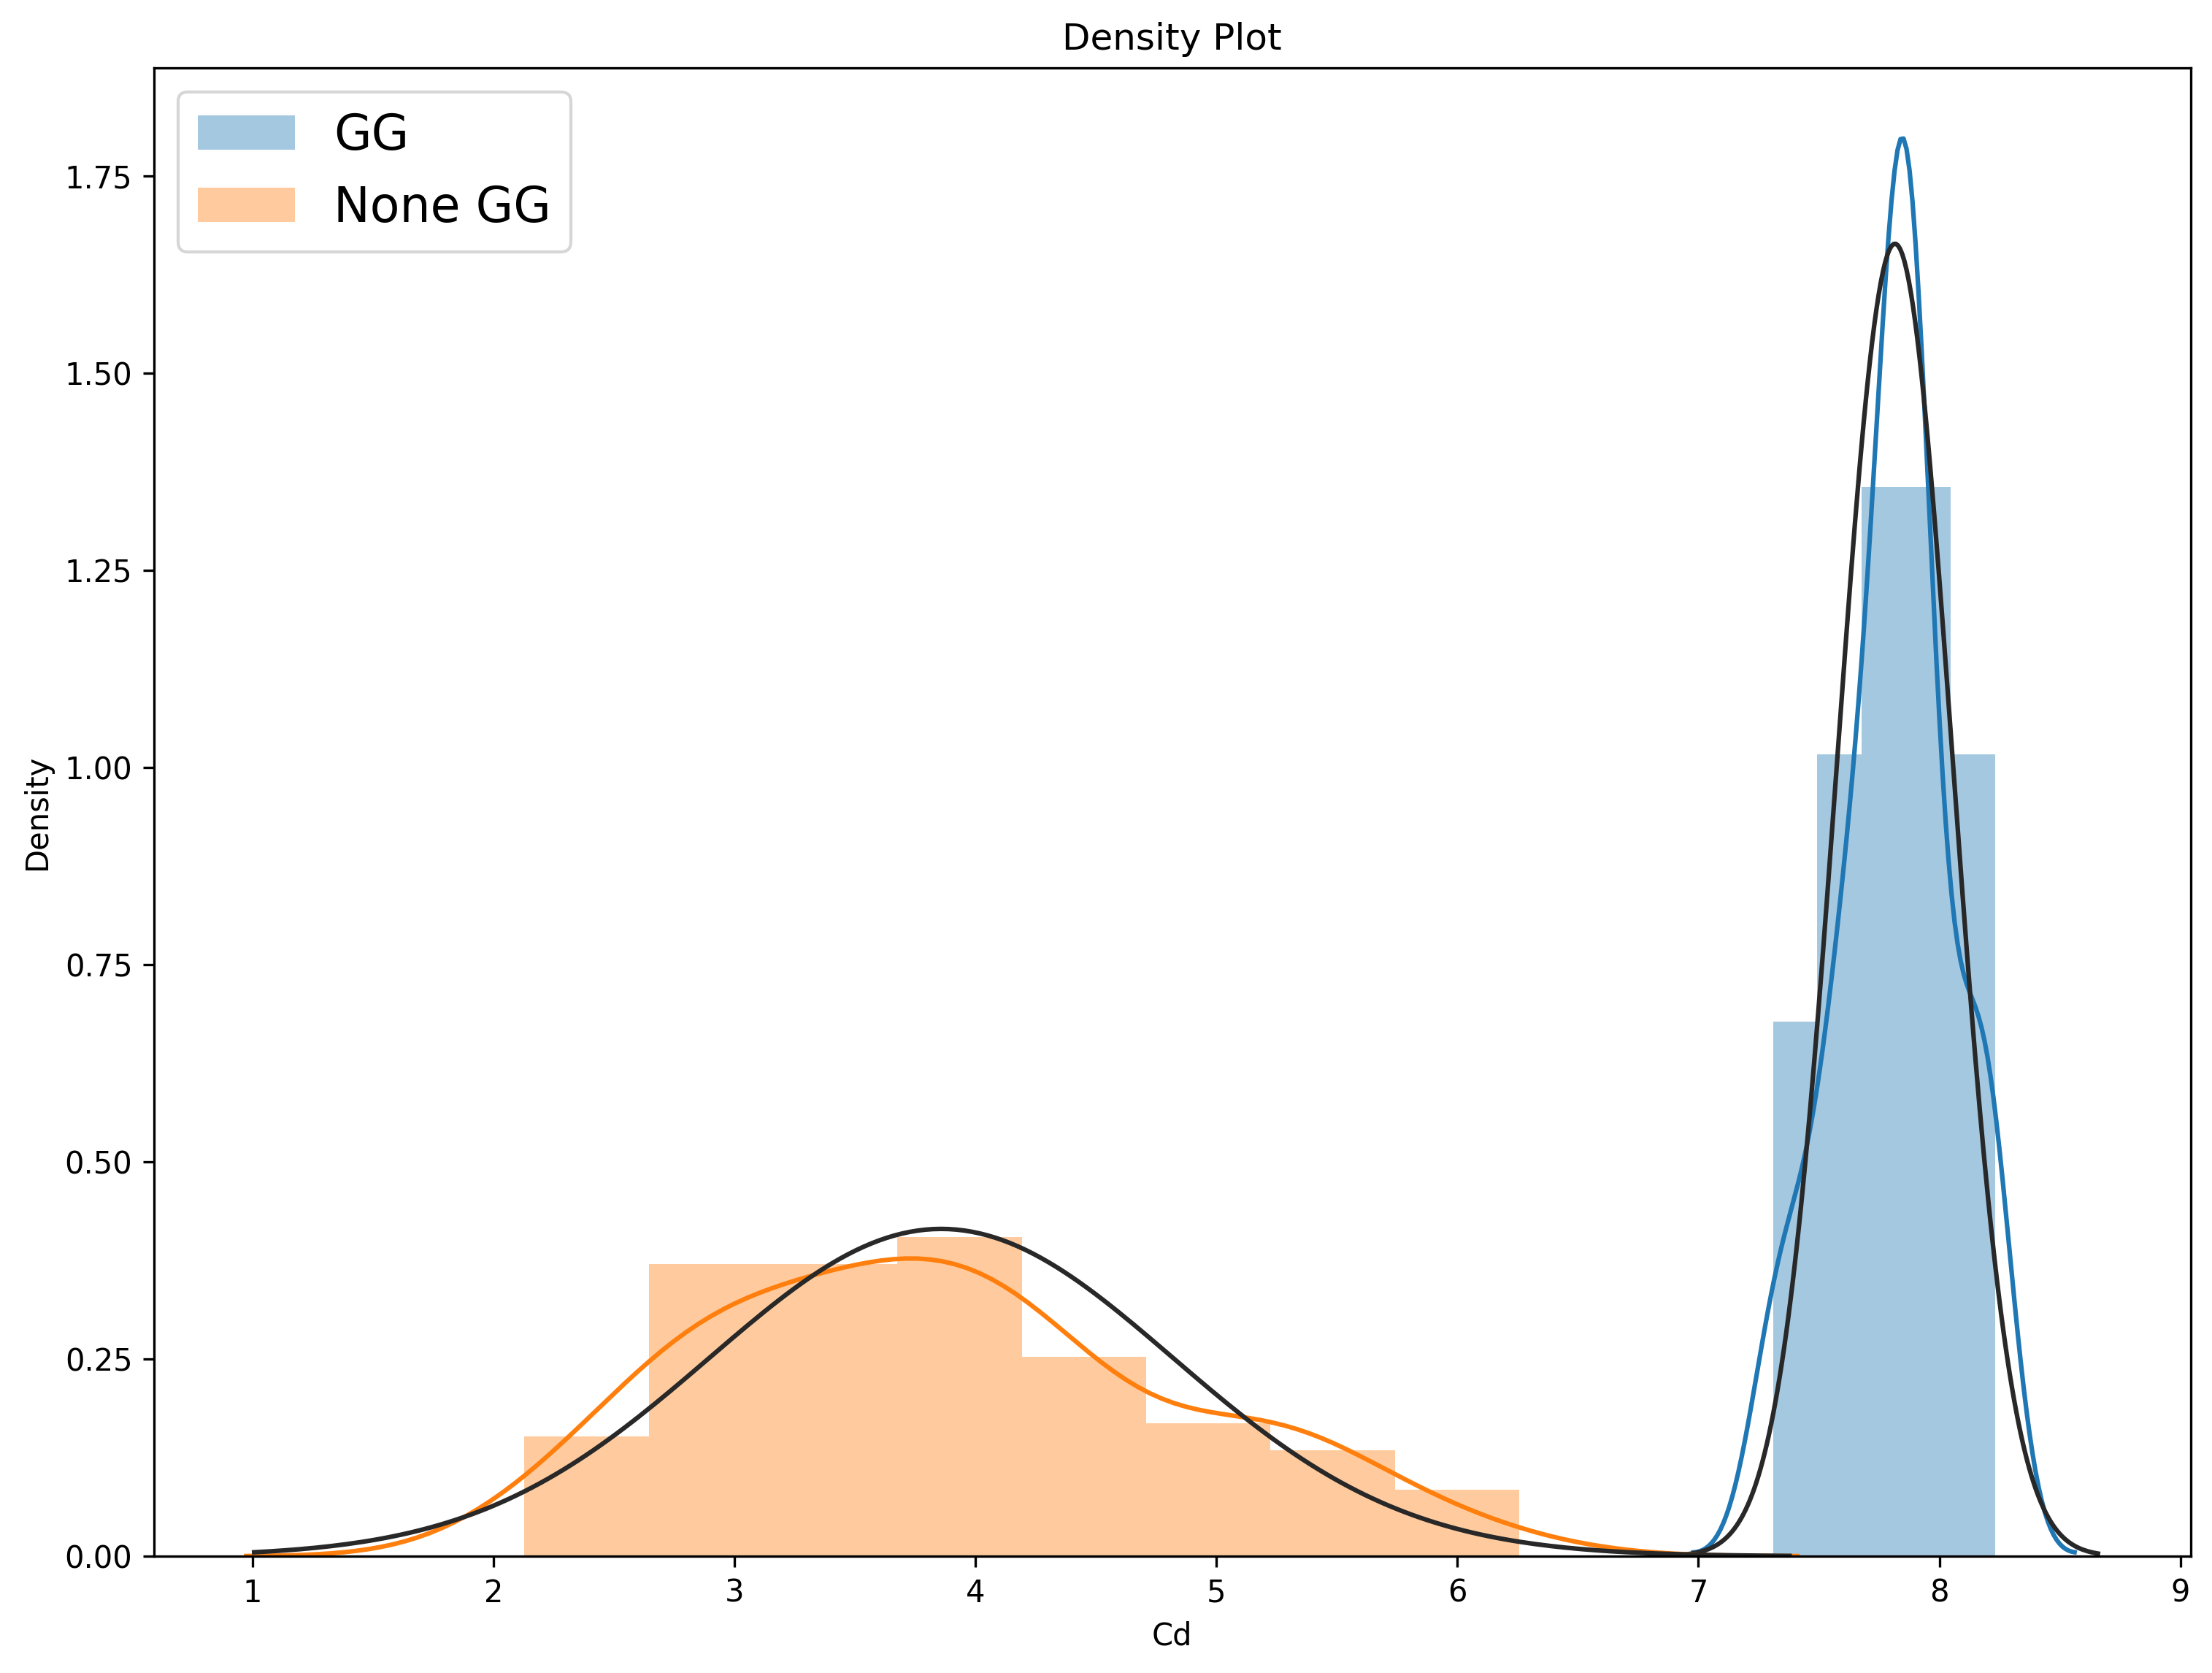

In [56]:
locations = ['GG', 'None GG']

density_plot(locations, data_dup, 'Cd')

In [25]:
Cd_describe = data_dup.groupby('lv')['Cd'].describe()

In [27]:
Cd_describe.to_csv("/Users/analytical/Documents/GitHub/Rice_authenticity_ICP_new/Cd_describe.csv")